In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
data = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\DS\Internship\Cleaned_merged_data_Dhanshree.csv")

In [3]:
data.columns

Index(['ActivitySiteID', 'ActivityDescription',
       'BookingEndDateTime(Day/Month/Year)', 'BookingStartTime', 'MaxBookees',
       'Number Booked', 'Price (INR)', 'ClassName', 'ClassTime'],
      dtype='object')

In [7]:
#Rename column 
data.rename(columns={'BookingEndDateTime(Day/Month/Year)':'BookingEndDateTime'},inplace=True)

In [9]:
data['BookingEndDateTime'] =pd.to_datetime(data['BookingEndDateTime'],dayfirst=True)

In [11]:
data.set_index('BookingEndDateTime',inplace=True)

In [13]:
# Add Dayweek and hour column 
data['DayofWeek'] =data.index.day_of_week
data['Hour'] = pd.to_datetime(data['BookingStartTime'], format ='%I:%M %p').dt.hour

### Summarizing data on day of week and hourly basis

In [15]:
day_of_week_bookings = data.groupby('DayofWeek')['Number Booked'].sum()

In [17]:
hourly_booking = data.groupby("Hour")['Number Booked'].sum()

### Visualising data 

([<matplotlib.axis.XTick at 0x21fc5e19160>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

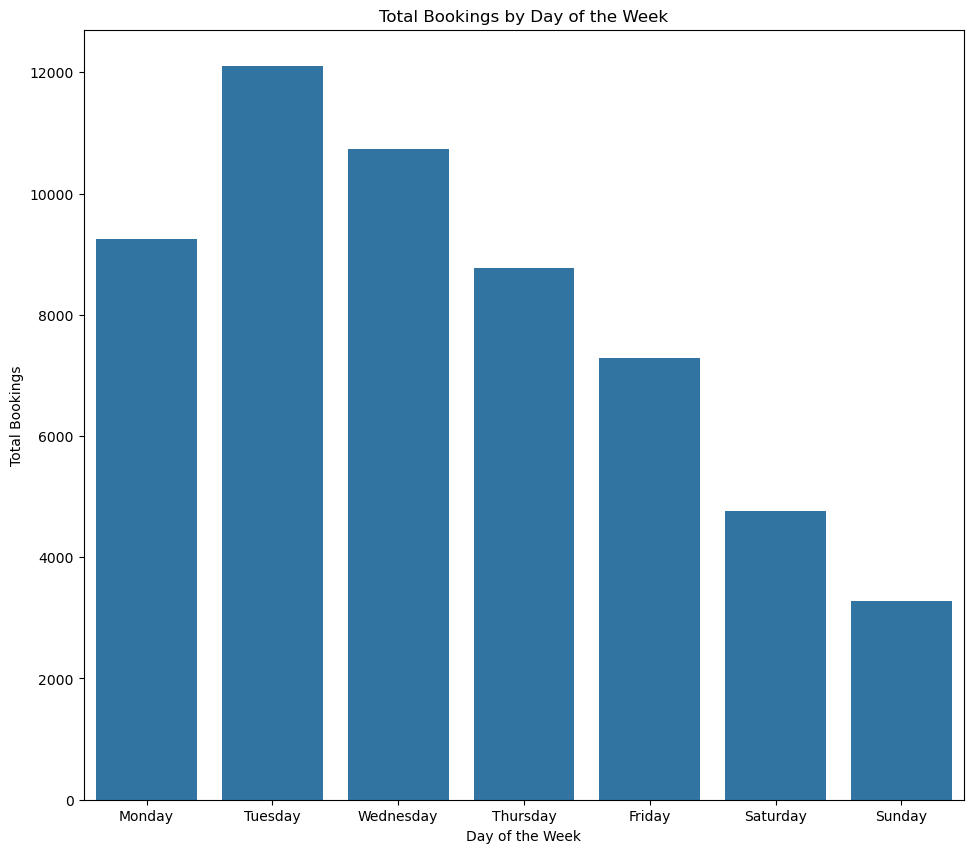

In [25]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.barplot(x= day_of_week_bookings.index,y =day_of_week_bookings.values)
plt.title("Total Bookings by Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel("Total Bookings")
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


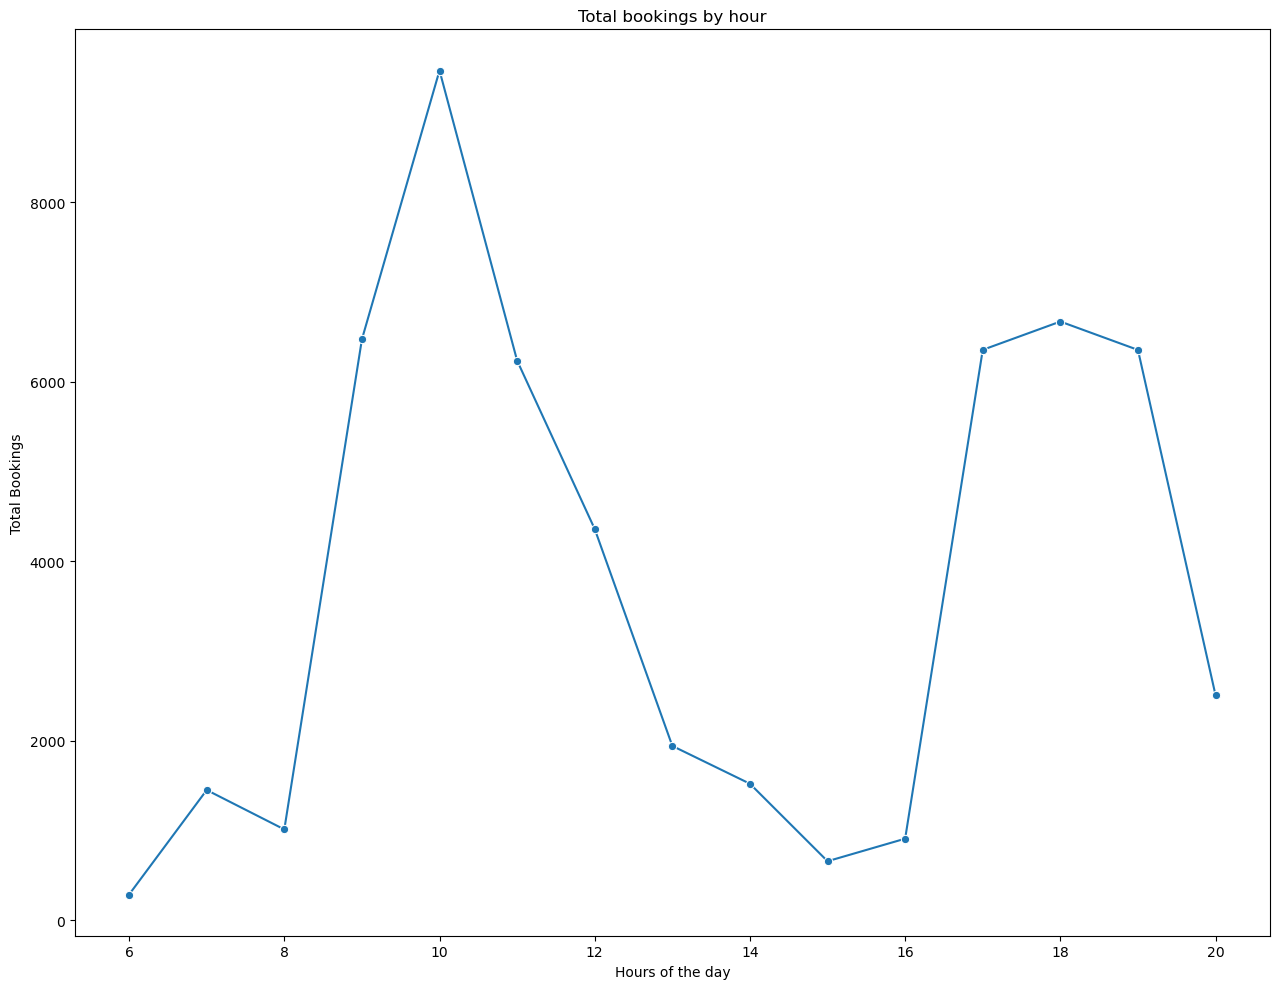

In [39]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
sns.lineplot(x=hourly_booking.index , y=hourly_booking.values,marker='o')
plt.title("Total bookings by hour")
plt.xlabel("Hours of the day")
plt.ylabel("Total Bookings")
plt.tight_layout() 
plt.show()

In [36]:
data.columns

Index(['ActivitySiteID', 'ActivityDescription', 'BookingStartTime',
       'MaxBookees', 'Number Booked', 'Price (INR)', 'ClassName', 'ClassTime',
       'DayofWeek', 'Hour'],
      dtype='object')

In [45]:
#define Price adjustment rules 
def adjust_price(row):
    price =row['Price (INR)']  #Initial price 
    if row['ActivitySiteID'] == 'BRP': 
        price *=1.10   # For BRP center increase by 10 % 
        return price
    elif row['ActivitySiteID'] =='TSC': 
        price *= 0.90   #For TSC center decrease by 10%
        return price
    popular_classes = ['Studio Cycling','Body Combat', 'Pilates', 'Yoga', 'Aquafit','Body Conditioning','T-T-T']
    if row['ClassName'] in popular_classes:
        price *= 1.15  # Increase by 15% for popular classes
        return price
    elif row['Number Booked'] <= 50:
        price *= 0.85  # Decrease by 15% for classes with bookings <= 50
        return price
    
    # Priority 3: Time-based adjustment
    if ((row['Hour'] in [9, 10, 11, 12, 17, 18, 19]) and (row['DayofWeek'] < 5)):
        price *= 1.15  # Increase by 15% for specific times on weekdays
        return price
    elif row['DayofWeek'] >= 5:
        price *= 0.85  # Decrease by 15% for weekends
        return price
    
    # Priority 4: Popularity-based adjustment
    if row['Number Booked'] / row['MaxBookees'] < 0.5:
        price *= 0.85  # Decrease by 15% if bookings < 50% of max
        return price
    elif row['Number Booked'] / row['MaxBookees'] >= 0.5:
        price *= 1.15  # Increase by 15% if bookings >= 50% of max
        return price
    
    return price
        

In [47]:
# Apply the pricing adjustments
data['Adjusted Price(INR)'] = data.apply(adjust_price, axis=1)

In [53]:
# Preview the adjusted prices
print(data[['ClassName', 'Price (INR)', 'Adjusted Price(INR)', 'Number Booked', 'MaxBookees', 'DayofWeek', 'Hour', 'ActivitySiteID']].head())


                   ClassName  Price (INR)  Adjusted Price(INR)  Number Booked  \
BookingEndDateTime                                                              
2018-04-08             T-T-T          499               573.85             12   
2018-04-15             T-T-T          499               573.85             15   
2018-04-22             T-T-T          499               573.85             14   
2018-04-29             T-T-T          499               573.85              9   
2018-05-06             T-T-T          499               573.85              7   

                    MaxBookees  DayofWeek  Hour ActivitySiteID  
BookingEndDateTime                                              
2018-04-08                  25          6    14            HXP  
2018-04-15                  25          6    14            HXP  
2018-04-22                  25          6    14            HXP  
2018-04-29                  25          6    14            HXP  
2018-05-06                  25          6 

In [55]:
data.to_csv(r'C:\Users\HP\OneDrive\Documents\DS\Internship\CSV_results\Dynamic_price.csv',index=False)
